1. importing datasets from github using url
2. merging the datasets

In [3]:
import pandas as pd

df1 = pd.read_csv("D:\\PDS\\Datasets\\Food_Preference.csv")
df2 = pd.read_csv("D:\\PDS\\Datasets\\indian_food.csv")

merged_df = pd.merge(df1, df2, how='outer', left_on='Food', right_on='name')

print(merged_df.head())

  Timestamp Participant_ID Gender Nationality  Age Food Juice Dessert  \
0       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN   
1       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN   
2       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN   
3       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN   
4       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN   

                name                                        ingredients  \
0          Adhirasam   Rice flour, jaggery, ghee, vegetable oil, elachi   
1          Aloo gobi  Cauliflower, potato, garam masala, turmeric, c...   
2         Aloo matar  Potato, peas, chillies, ginger, garam masala, ...   
3         Aloo methi      Potato, fenugreek leaves, chillies, salt, oil   
4  Aloo shimla mirch  Potato, shimla mirch, garam masala, amchur pow...   

         diet  prep_time  cook_time flavor_profile       course        state  \
0  vegetarian       10.0      

1.	Importing necessary libraries like pandas, matplot seaborn and scipy.stats
2.	Load the dataset
3.	Collecting the basic information about data by using functions
4.	Checking for null values
5.	Dropping rows which contains null values
6.	Filling missing values
7.	Checking for duplicated rows
8.	Plotted scatter graph for comparing minutes required for preparation and cooking time
9.	Plotting bar graph for Diet type (vegetarian or non-vegetarian) and count (no of people)
10.	Creating pie chart for course distribution (no of people eating snacks, dessert, main course etc.)
11.	Plotting box for detecting outliers in cooking and prep time (so outliers are visible)
12.	Plotting wave graph (uniform curve) for minute required for cooking and prepping time (comparing those mins)
13.	Calculating skewness
14.	Detecting outliers using IQR (inter quantile range)
15.	Filtering out outliers
16.	Z score normalization

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB

Dataset Description:
              name              ingredients        diet   prep_time  \
count          255                      255         255  255.000000   
unique         255                      252           2         NaN   
top     Balu shahi  Gram flour, ghee, sugar  vegetarian         NaN   
freq             1                       

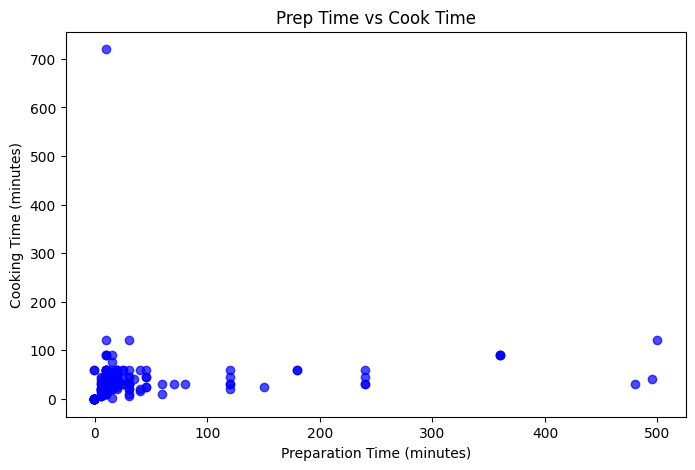

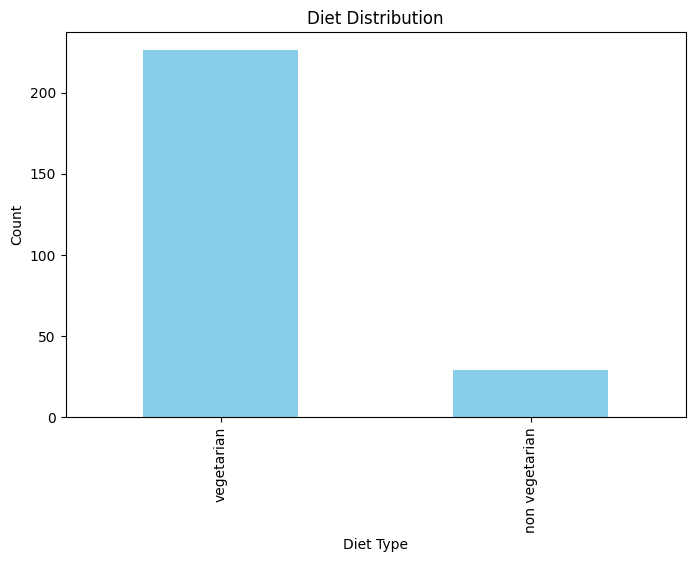

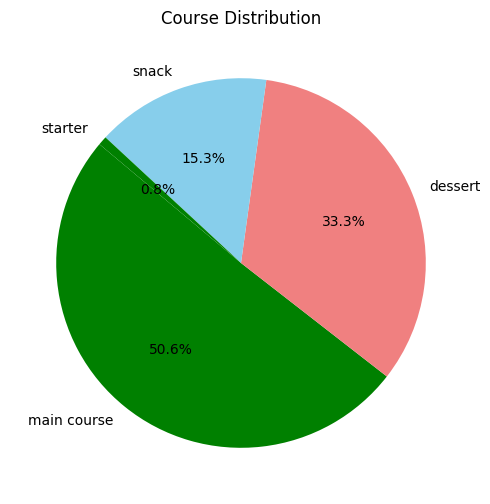

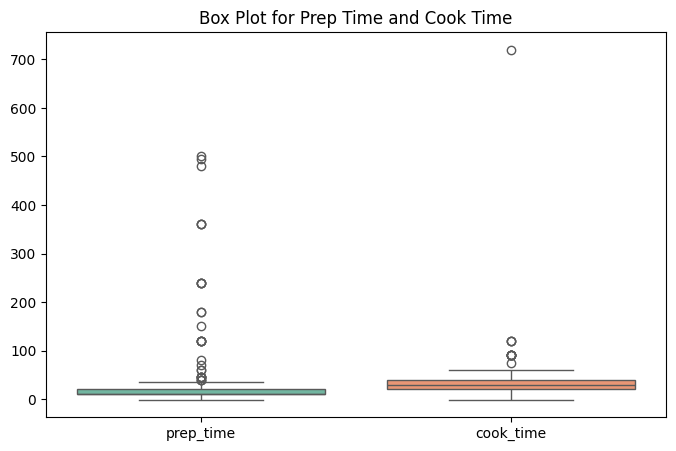

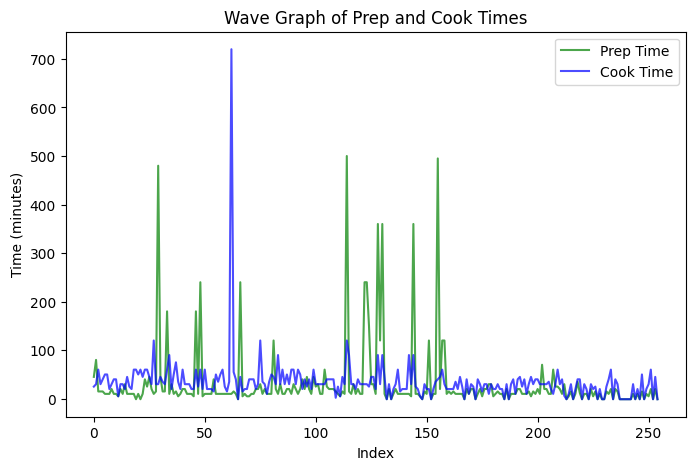


Skewness of Numeric Columns:
prep_time     4.636301
cook_time    11.433430
dtype: float64

IQR:
prep_time    10.0
cook_time    20.0
dtype: float64

Number of Outliers:
38

First 5 Rows of Normalized Data:
             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian   0.191876  -0.197825          sweet  dessert  West Bengal   
1  vegetarian   0.675221  -0.094028          sweet  dessert    Rajasthan   
2  vegetarian  -0.222420   0.528754          sweet  dessert       Punjab   
3  vegetarian  -0.222420  -0.094028          sweet  desse

In [4]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
file_path = "D:\\PDS\\Datasets\\indian_food.csv"
df = pd.read_csv(file_path)

# Basic Data pre-processing
print("Dataset Info:")
df.info()
print("\nDataset Description:")
print(df.describe(include='all'))
print("\nFirst 5 Rows:")
print(df.head())

# Checking for null values
print("\nNull Values in Each Column:")
print(df.isnull().sum())

# Handling Missing Data
# Dropping rows with any missing values
df_cleaned = df.dropna()
print("\nAfter Dropping Nulls:")
print(df_cleaned.isnull().sum())

# Filling missing values with column means (if numeric)
df_filled = df.fillna(df.mean(numeric_only=True))
print("\nDataset after Filling Nulls with Column Means:")
print(df_filled.isnull().sum())

# Value counts for a specific column ('diet' as an example)
print("\nValue Counts for 'diet':")
print(df['diet'].value_counts())

# Checking for Duplicates
print("\nNumber of Duplicated Rows:")
print(df.duplicated().sum())

# Visualizations
# Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['prep_time'], df['cook_time'], alpha=0.7, color='b')
plt.title('Prep Time vs Cook Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cooking Time (minutes)')
plt.show()

# Bar Plot
plt.figure(figsize=(8, 5))
df['diet'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Diet Distribution')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
df['course'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'lightcoral', 'skyblue'])
plt.title('Course Distribution')
plt.ylabel('')
plt.show()

# Box Plot (Outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['prep_time', 'cook_time']], palette='Set2')
plt.title('Box Plot for Prep Time and Cook Time')
plt.show()

# Wave Graph (Uniform Curve)
plt.figure(figsize=(8, 5))
plt.plot(df['prep_time'], label='Prep Time', color='green', alpha=0.7)
plt.plot(df['cook_time'], label='Cook Time', color='blue', alpha=0.7)
plt.title('Wave Graph of Prep and Cook Times')
plt.xlabel('Index')
plt.ylabel('Time (minutes)')
plt.legend()
plt.show()

# Skewness
print("\nSkewness of Numeric Columns:")
print(df[['prep_time', 'cook_time']].skew())

# Outlier Detection using IQR
Q1 = df[['prep_time', 'cook_time']].quantile(0.25)
Q3 = df[['prep_time', 'cook_time']].quantile(0.75)
IQR = Q3 - Q1
print("\nIQR:")
print(IQR)

# Filtering out outliers
outliers = ((df[['prep_time', 'cook_time']] < (Q1 - 1.5 * IQR)) | (df[['prep_time', 'cook_time']] > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nNumber of Outliers:")
print(outliers.sum())

# Z-score Normalization
df_normalized = df.copy()
columns_to_normalize = ['prep_time', 'cook_time']
df_normalized[columns_to_normalize] = df[columns_to_normalize].apply(zscore)
print("\nFirst 5 Rows of Normalized Data:")
print(df_normalized.head())
